## Contents
1. Importing Libraries and Data (orders_products_all.pkl)
2. Data Security Check
3. Spending Habits by Region
4. Excluding Low-Activity Customers
5. Customers Profiling Variables
6. Profile Visualizations
7. Profile Aggregation
8. Customer Profiles by Region and Department¶
9. Visualizations for Results
10. Extra Analysis
11. Questions from Project Brief
12. Export Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Step 1: Import Dataset

In [3]:
# Import Data
path = r'/Users/maitran/Documents/Instacart Basket Analysis'

In [4]:
# Import the customer_data_set dataframe
df_ic_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged.pkl'))

In [6]:
# Check df output
df_ic_combined.shape

(32404859, 36)

### Step 2: Address PII data

In [7]:
df_ic_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   eval_set                object  
 3   order_number            int64   
 4   order_day_of_week       int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  Unnamed: 0              int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  _merge                  category
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  price_range_loc         object  
 20  max_order               int64   
 21  loyalt

Observation: The dataset has customer's first name and surname which are elements of PII data. Therefore, we need to remove them. The steps are shown below:

In [215]:
# Create new dataframe in which columns "first_name" and "surname" are removed
df_ic = df_ic_combined.drop(columns = ['first_name', 'surname'])

### Step 3: Customer Spending behavior by Regions

In [8]:
# Divide States into regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Assign each state to its region
region =[]
for value in df_ic['state']:
    if value in northeast:
        region.append('Northeast')
    elif value in midwest:
        region.append('Midwest')
    elif value in south:
        region.append('South')
    elif value in west:
        region.append('West')

In [10]:
# Create "region" column
df_ic['region'] = region

In [13]:
# Check the df to see if the region column is added
df_ic.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'price_range_loc', 'max_order',
       'loyalty_flag', 'avg_order', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'fam_status', 'income', 'True', 'region'],
      dtype='object')

In [14]:
# Check frequency distribution of 'region'
df_ic['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [11]:
# Create a crosstab between region and spending_flag columns
crosstab_region_spending = pd.crosstab(df_ic['region'], df_ic['spending_flag'], dropna = False)

In [12]:
#Check output
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Observation: Based on the output, it does not appear to be a significant difference in spending habits between the different regions. The number of high spenders is relatively similar across all regions, ranging from 108225 in the Northeast to 209691 in the Midwest. Similarly, the number of low spenders is also quite similar, ranging from 5614511 in the Northeast to 10582194 in the South. 

### Step 4: Exclue low-activity customers

In [216]:
# Create an exclusion flag for low-activity customers
exclusion_flag= df_ic[df_ic['max_order'] < 5]

In [18]:
# Set default value of 'exclusion' column to 'low activity'
df_ic['exclusion'] = 'low activity'

In [19]:
# Update rows where max_order is >= 5
df_ic.loc[df_ic['max_order'] >= 5, 'exclusion'] = 'active'

In [20]:
df_ic.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_of_dependants,fam_status,income,True,region,exclusion
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active


In [21]:
# Create a new dataframe df_ic_active_cus that only includes active customers, and exclude low activity customers
df_ic_active_cus = df_ic.loc[df_ic['exclusion'] == 'active']

In [41]:
# Export the updated data
df_ic_active_cus.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_customers.pkl'))

### Step 5: Customer Profiling Variables

### a. Age

In [5]:
# Import the new dataframe
df_ic_active_cus = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

In [6]:
# Create age group classifications
df_ic_active_cus.loc[(df_ic_active_cus['age'] <= 25), 'age_group'] = 'Young'
df_ic_active_cus.loc[(df_ic_active_cus['age'] > 25) & (df_ic_active_cus['age'] < 65), 'age_group'] = 'Mid-aged'
df_ic_active_cus.loc[(df_ic_active_cus['age'] >= 65), 'age_group'] = 'Senior'
df_ic_active_cus.loc[df_ic_active_cus['age_group'].isna(), 'age_group'] = 'Unknown'


In [42]:
# Check frequency distribution
df_ic_active_cus.age_group.value_counts(dropna = False)

Mid-aged    18904502
Senior       8195544
Young        3864518
Name: age_group, dtype: int64

### b. Income

In [7]:
# Create income_group classification
df_ic_active_cus.loc[(df_ic_active_cus['income'] <75000), 'income_group'] = 'Low income'
df_ic_active_cus.loc[(df_ic_active_cus['income'] >= 75000) & (df_ic_active_cus['income'] < 150000), 'income_group'] = 'Mid income'
df_ic_active_cus.loc[(df_ic_active_cus['income'] >= 150000), 'income_group'] = 'High income'
df_ic_active_cus.loc[df_ic_active_cus['income_group'].isna(), 'income_group'] = 'Unknown'

In [46]:
# Check frequency distribution
df_ic_active_cus.income_group.value_counts(dropna = False)

Mid income     17162609
Low income      9906680
High income     3895275
Name: income_group, dtype: int64

### c. Department - Veganism

In [8]:
# Import Department Dataframe
df_ic_department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [78]:
# Check department's categories
df_ic_department.head(25)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


I will create the customer's profile based on vegans and non-vegans customer.

Vegans don't eat meat (department_id=12) and dairy (department_id=16)

In [9]:
# Creating a crosstab between 'department_id' and 'user_id'
crosstab_dep_user_cross = pd.crosstab(df_ic_active_cus['user_id'], df_ic_active_cus['department_id'], dropna = False)

In [10]:
# Identify the department_ids that correspond to non-vegan products
non_vegan_dept_ids = [12, 16]

In [11]:
# Calculate the total number of non-vegan products each user has purchased:
crosstab_dep_user_cross['non_vegan_count'] = crosstab_dep_user_cross[non_vegan_dept_ids].sum(axis=1)

In [12]:
# Classify each user_id as either "vegan" or "non-vegan" based on their non-vegan product count
crosstab_dep_user_cross.loc[crosstab_dep_user_cross['non_vegan_count'] == 0, 'veganism_group'] = 'vegan'
crosstab_dep_user_cross.loc[crosstab_dep_user_cross['non_vegan_count'] > 0, 'veganism_group'] = 'non-vegan'

In [33]:
crosstab_dep_user_cross.head(10)

department_id,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,non_vegan_count,veganism_group
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,13,0,0,0,...,3,0,13,2,0,22,0,0,13,non-vegan
10,1,0,0,72,0,1,0,0,0,0,...,0,2,16,0,0,1,15,0,29,non-vegan
100,3,0,2,10,0,0,0,0,0,0,...,0,0,2,0,0,2,5,0,5,non-vegan
1000,5,0,1,34,0,0,19,0,0,0,...,0,4,32,0,0,2,3,2,32,non-vegan
10000,56,0,56,340,0,2,36,0,38,1,...,13,23,231,18,0,61,47,0,287,non-vegan
100000,0,0,8,51,2,1,1,0,1,0,...,1,0,16,0,0,5,2,0,32,non-vegan
100001,16,0,17,393,0,24,55,0,9,0,...,8,28,130,0,1,45,3,0,140,non-vegan
100002,7,0,1,0,0,0,2,0,0,0,...,4,5,21,0,0,5,1,0,21,non-vegan
100004,0,0,0,0,0,0,14,0,4,0,...,0,0,0,1,17,5,1,0,0,vegan


In [13]:
# Merge the "veganism_group" classification back into the original DataFrame
df_ic_active = pd.merge(df_ic_active_cus, crosstab_dep_user_cross['veganism_group'], on='user_id', how='left')

In [15]:
# Check frequency distribution
df_ic_active.veganism_group.value_counts(dropna = False)

non-vegan    30654568
vegan          309996
Name: veganism_group, dtype: int64

### d. Family Size


In [39]:
df_ic_active.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_of_dependants,fam_status,income,True,region,exclusion,veganism_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,both,South,active,non-vegan
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,both,South,active,non-vegan
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,both,South,active,non-vegan
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,both,South,active,non-vegan
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,both,South,active,non-vegan


In [16]:
# Check frequency distribution
df_ic_active.fam_status.value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [14]:
# Create family_size classification
def classify_customer(row):
    if row['fam_status'] == 'married' and row['number_of_dependants'] == 0:
        return 'married, no children'
    elif row['fam_status'] == 'single' and row['number_of_dependants'] == 0:
        return 'single, no children'
    elif row['fam_status'] == 'married' and row['number_of_dependants'] > 0:
        return 'married with children'
    elif row['fam_status'] == 'single' and row['number_of_dependants'] > 0:
        return 'single with children'
    elif row['fam_status'] == 'divorced/widowed' and row['number_of_dependants'] == 0:
        return 'divorced/widowed, no children'
    elif row['fam_status'] == 'divorced/widowed' and row['number_of_dependants'] > 0:
        return 'divorced/widowed with children'
    else:
        return 'unknown'


In [15]:
# apply the function to each row of the dataframe df_ic_active
df_ic_active['family_size'] = df_ic_active.apply(classify_customer, axis=1)

In [16]:
# Check output
df_ic_active.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,number_of_dependants,fam_status,income,True,region,exclusion,age_group,income_group,veganism_group,family_size
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children
2,473747,1,prior,3,3,12,21.0,196,1,1,...,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children
4,431534,1,prior,5,4,15,28.0,196,1,1,...,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children


In [17]:
# Check frequency distribution
df_ic_active.family_size.value_counts(dropna = False)

married with children            21743711
single, no children               5094410
divorced/widowed, no children     2645271
unknown                           1481172
Name: family_size, dtype: int64

In [18]:
# Export Data
df_ic_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customer_profiles.pkl'))

### Step 6: Profile Visualizations

### a. Age groups

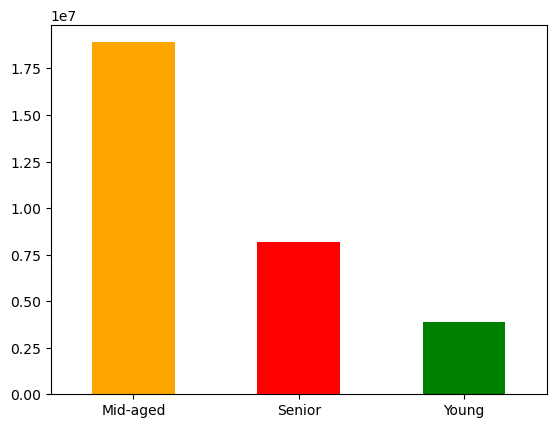

In [49]:
# Create the bar plot and set the colors based on the age group
age_group_bar = df_ic_active['age_group'].value_counts().plot.bar(rot=0, color=['orange', 'red', 'green'])

In [50]:
# Set the title of the chart
age_group_bar.set_title('Age Groups of Customers')

Text(0.5, 1.0, 'Age Groups of Customers')

In [51]:
# Exporting the viz
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_bar.png'))

### b. Income groups

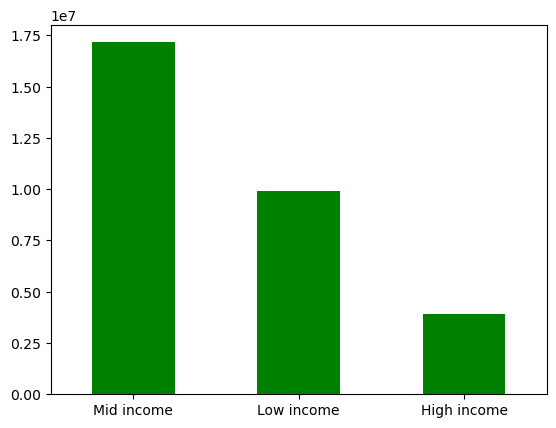

In [42]:
# Create the bar plot and set the colors based on the income group
income_group_bar = df_ic_active['income_group'].value_counts().plot.bar(rot=0, color=['green'])

In [43]:
# Set the title of the chart
income_group_bar.set_title('Income Groups of Customers')

Text(0.5, 1.0, 'Income Groups of Customers')

In [44]:
# Exporting the viz

income_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_bar.png'))

### c. Veganism

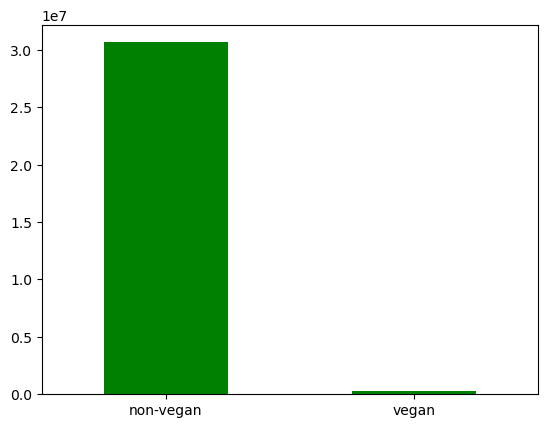

In [54]:
# create income_group bar chart
veganism_group_bar = df_ic_active['veganism_group'].value_counts().plot.bar(rot=0, color=['green'])

In [57]:
# Set the title of the chart
veganism_group_bar.set_title('Veganism Groups of Customers')

Text(0.5, 1.0, 'Veganism Groups of Customers')

In [58]:
# Exporting the viz

veganism_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'veganism_group_bar.png'))

### d. Family Size

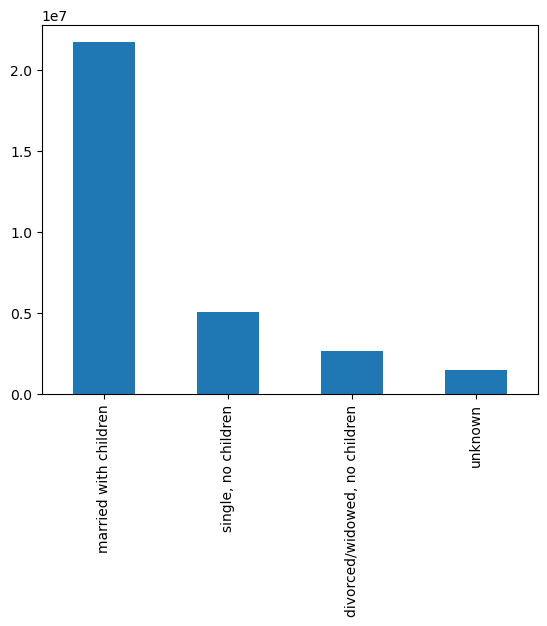

In [125]:
# create family_size bar chart

family_size_bar = df_ic_active['family_size'].value_counts().plot.bar()

In [60]:
# Set the title of the chart
family_size_bar.set_title('Family Sizes of Customers')

Text(0.5, 1.0, 'Family Sizes of Customers')

In [61]:
# Exporting the viz
family_size_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_size_bar.png'))

### Step 7: Profile Aggregation


In [62]:
# Usage freq. and expenditure by Age groups
crosstab_age_orderhabits = df_ic_active.groupby('age_group').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_prior_order': ['mean', 'min', 'max']})

In [63]:
# Check output
crosstab_age_orderhabits

prices               days_since_prior_order           
                mean  min      max                   mean  min   max
age_group                                                           
Mid-aged   11.953327  1.0  99999.0              10.820618  0.0  30.0
Senior     11.757768  1.0  99999.0              10.791788  0.0  30.0
Young      12.209359  1.0  99999.0              10.799071  0.0  30.0

OObservation: The average expenditure on products is similar across all age groups, with young adults spending slightly more than mid-aged and senior individuals. Additionally, there is no significant difference in the range of prices paid by each age group, as indicated by the minimum and maximum values.

When it comes to order habits, there is also no significant difference in the number of days since the prior order among the age groups. On average, all groups tend to order every 10-11 days. This implies that there is no strong correlation between age and the frequency of purchases made by customers.

Overall, the data indicates that age is not a major factor influencing customers' spending and ordering habits. 

In [65]:
# Usage freq. and expenditure by Income groups
crosstab_income_orderhabits = df_ic_active.groupby('income_group').agg({'prices': ['mean', 'min', 'max'], 
                                                                    'days_since_prior_order': ['mean', 'min', 'max']})

In [67]:
# Check output
crosstab_income_orderhabits

prices               days_since_prior_order           
                   mean  min      max                   mean  min   max
income_group                                                           
High income   32.615289  1.0  99999.0              10.684337  0.0  30.0
Low income     7.451187  1.0  14900.0              10.900972  0.0  30.0
Mid income     9.826842  1.0  99999.0              10.786651  0.0  30.0

Observation: There is a notable difference in the average expenditure on products by income group. Customers in the high-income group spend significantly more on products, with an average price of 32.62 dollars per item. In contrast, customers in the low-income group have the lowest average price paid per item, at 7.45 dollars. Customers in the mid-income group fall in between, with an average price of 9.83 dollars per item.

Moreover, the data indicates that there is a notable difference in the range of prices paid by each income group, as indicated by the minimum and maximum values. Customers in the high-income group pay a higher maximum price per item than those in the low-income group.

Regarding ordering habits, there is no significant difference in the mean number of days since the prior order among the income groups. All groups tend to order products every 10-11 days on average, which indicates that the frequency of orders is not strongly correlated with the customers' income.

Overall, income has a significant impact on customers' purchasing behavior, with high-income customers being more likely to spend more money on products. However, income does not appear to have a significant impact on the frequency of orders.

In [71]:
# Usage freq. and expenditure by Family size
cross_family_orderhabits = df_ic_active.groupby('family_size').agg({'prices': ['mean', 'min', 'max'], 
                                                                  'days_since_prior_order': ['mean', 'min', 'max']})

In [72]:
# Check output
cross_family_orderhabits 

prices               days_since_prior_order  \
                                    mean  min      max                   mean   
family_size                                                                     
divorced/widowed, no children  11.532741  1.0  99999.0              10.750328   
married with children          11.944390  1.0  99999.0              10.820875   
single, no children            12.398586  1.0  99999.0              10.813571   
unknown                        10.890167  1.0  99999.0              10.750995   

                                          
                               min   max  
family_size                               
divorced/widowed, no children  0.0  30.0  
married with children          0.0  30.0  
single, no children            0.0  30.0  
unknown                        0.0  30.0

Observation: The data indicates that there is no significant difference in the mean prices paid per item by each family size group. All family size groups have similar average expenditure on products, with the mean price per item ranging from $10.89 to $12.40.

Additionally, there is no notable difference in the range of prices paid by each family size group, as indicated by the minimum and maximum values.

When it comes to ordering habits, there is no significant difference in the mean number of days since the prior order among the family size groups. All groups tend to order products every 10-11 days on average, which indicates that the frequency of orders is not strongly correlated with the customers' family size.

Overall, the data suggests that family size does not have a significant impact on customers' purchasing behavior, and there is no strong correlation between family size and the frequency of orders or the prices paid per item.


In [73]:
# Usage freq. and expenditure by veganism groups
cross_vegan_orderhabits = df_ic_active.groupby('veganism_group').agg({'prices': ['mean', 'min', 'max'], 
                                                                'days_since_prior_order': ['mean', 'min', 'max']})

In [75]:
# Check output
cross_vegan_orderhabits

prices               days_since_prior_order           
                     mean  min      max                   mean  min   max
veganism_group                                                           
non-vegan       11.983845  1.0  99999.0              10.781076  0.0  30.0
vegan            6.957126  1.0     20.0              13.800485  0.0  30.0

Observation: The data indicates that customers who identify as vegans tend to spend less on average per item compared to non-vegan customers, with a mean price per item of $6.96 for vegans and $11.98 for non-vegans. ]

When it comes to ordering habits, vegans tend to order products less frequently on average than non-vegans, with a mean number of days since the prior order of 13.80 days for vegans and 10.78 days for non-vegans. 

Overall, the data suggests that customers' veganism status may have some influence on their purchasing behavior, with vegans tending to spend less on average per item and order products less frequently than non-vegans.

### Step 8: Customer Profiles by Region and Department

### 1. Customer Profiles by Region

### a. Age

In [77]:
# Creating a crosstab comparing 'age_profile' and 'region', looking at column percentages
crosstab_age_region = pd.crosstab(df_ic_active['age_group'], df_ic_active['region'], normalize = 'columns')

In [78]:
crosstab_age_region

region,Midwest,Northeast,South,West
age_group,,,,
Mid-aged,0.614102,0.603872,0.609796,0.612766
Senior,0.262211,0.271710,0.262673,0.264687
Young,0.123687,0.124419,0.127531,0.122548


Observation: There are some differences in the distribution of age groups across the four regions, but the differences are relatively small. For example, the column percentages for the three age groups are all within a few percentage points of each other across all four regions.


### b. Income

In [80]:
# Creating a crosstab comparing 'income_group' and 'region', looking at column percentages
crosstab_income_region = pd.crosstab(df_ic_active['income_group'], df_ic_active['region'], normalize = 'columns')

In [81]:
crosstab_income_region

region,Midwest,Northeast,South,West
income_group,,,,
High income,0.126350,0.124020,0.125152,0.127357
Low income,0.316811,0.316579,0.321363,0.323257
Mid income,0.556838,0.559401,0.553485,0.549386


Observation: There are some differences in the distribution of income groups across the four regions, but the differences are relatively small. For example, the column percentages for the three income groups are all within a few percentage points of each other across all four regions.

### c. Veganism

In [89]:
# Creating a crosstab comparing 'vegan_profile' and 'region', looking at column percentages
crosstab_vegan_region = pd.crosstab(df_ic['veganism_group'], df_ic['region'], normalize = 'columns')

In [85]:
crosstab_vegan_region

region,Midwest,Northeast,South,West
veganism_group,,,,
non-vegan,0.989956,0.989988,0.990194,0.989753
vegan,0.010044,0.010012,0.009806,0.010247


Observation: it seems that there are very small differences in the distribution of 'veganism_group' across the four regions. In all four regions, the vast majority of individuals (around 99%) are in the 'non-vegan' group, while only a small proportion (around 1%) are in the 'vegan' group.

### d. Family Status

In [86]:
# Creating a crosstab comparing 'family_profile' and 'region', looking at column percentages
crosstab_family_region = pd.crosstab(df_ic_active['family_size'], df_ic_active['region'], normalize = 'columns')


In [87]:
crosstab_family_region

region,Midwest,Northeast,South,West
family_size,,,,
"divorced/widowed, no children",0.084996,0.087611,0.085084,0.084770
married with children,0.700579,0.705214,0.700577,0.703768
"single, no children",0.166028,0.160250,0.165318,0.165059
unknown,0.048397,0.046925,0.049020,0.046403


Observation: There are not substantial differences in the distribution of family sizes across the four regions in terms of the proportion of individuals who are married with children, ranging from 70.1% in the Midwest to 70.5% in the Northeast.here are still some differences in the distribution of family sizes across the four regions. For example, the proportion of individuals in the 'single, no children' category is highest in the Midwest (16.6%) and lowest in the Northeast (16.0%). The proportion of individuals in the 'divorced/widowed, no children' category is also slightly higher in the Northeast (8.8%) compared to the other regions.

###  2. Customer Profile by Department

In [172]:
df_ic_department.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [174]:
# Merge department column from df_ic_department to df_ic_department
df_ic_active = pd.merge(df_ic_active, df_ic_department[['department_id', 'department']], on='department_id', how='left')

### a. Age

In [162]:
df_ic_department.rename(columns={'Unnamed': 'department_id'}, inplace=True)


In [175]:
# Creating a crosstab comparing 'age_group' and 'department_id', looking at row percentages
crosstab_age_department = pd.crosstab(df_ic_active['age_group'], df_ic_active['department'], normalize = 'index')  

In [176]:
crosstab_age_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Mid-aged,0.004694,0.013381,0.036233,0.083025,0.021692,0.001069,0.032704,0.167241,0.032483,0.026482,0.068322,0.022556,0.008274,0.021638,0.002088,0.001111,0.057565,0.013767,0.002927,0.293234,0.089515
Senior,0.004477,0.012959,0.036117,0.083462,0.021389,0.001091,0.032641,0.166929,0.032359,0.026516,0.068848,0.022772,0.008199,0.022103,0.002064,0.001092,0.057639,0.013550,0.003064,0.293831,0.088896
Young,0.004965,0.013258,0.036194,0.082376,0.022118,0.001114,0.032685,0.167548,0.032230,0.026963,0.068803,0.022464,0.008377,0.021886,0.002169,0.001153,0.057468,0.013713,0.003265,0.291815,0.089433


### b. Income

In [177]:
# Creating a crosstab comparing 'income_group' and 'department_id', looking at row percentages
crosstab_income_department = pd.crosstab(df_ic_active['income_group'], df_ic_active['department'], normalize = 'index')

In [178]:
crosstab_income_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
High income,0.006179,0.013606,0.038109,0.080451,0.021416,0.000942,0.033993,0.169243,0.032319,0.027302,0.070966,0.023793,0.008427,0.023496,0.002119,0.001169,0.059543,0.013743,0.003335,0.291341,0.078507
Low income,0.004500,0.011587,0.034469,0.091997,0.023525,0.001204,0.029791,0.161572,0.032182,0.024203,0.066628,0.023280,0.007699,0.017936,0.002100,0.001104,0.054859,0.013855,0.002838,0.280425,0.114245
Mid income,0.004427,0.014136,0.036761,0.078492,0.020648,0.001040,0.034058,0.169979,0.032578,0.027736,0.069059,0.021940,0.008559,0.023631,0.002081,0.001102,0.058691,0.013606,0.003027,0.301023,0.077425


### c. Veganism

In [179]:
# Creating a crosstab comparing 'vegan_profile' and 'department_id'
crosstab_vegan_department = pd.crosstab(df_ic_active['veganism_group'], df_ic_active['department'], normalize = 'index')

In [180]:
crosstab_vegan_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
veganism_group,,,,,,,,,,,,,,,,,,,,,
non-vegan,0.004371,0.013333,0.036396,0.081899,0.021669,0.001072,0.032861,0.168888,0.032577,0.026739,0.068655,0.022198,0.008312,0.022012,0.002095,0.001098,0.057723,0.013578,0.003007,0.293016,0.088501
vegan,0.034271,0.005426,0.016565,0.197812,0.021262,0.001871,0.015284,0.000000,0.016810,0.007919,0.055339,0.062546,0.003800,0.000000,0.001794,0.002410,0.042678,0.026042,0.002884,0.312920,0.172367


### d. Family Size

In [181]:
# Creating a crosstab comparing 'family_profile' and 'department_id'
crosstab_family_department = pd.crosstab(df_ic_active['family_size'], df_ic_active['department'], normalize = 'index')

In [182]:
crosstab_family_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
family_size,,,,,,,,,,,,,,,,,,,,,
"divorced/widowed, no children",0.004483,0.012986,0.036191,0.083500,0.021393,0.001012,0.031856,0.167318,0.032794,0.026557,0.069542,0.022095,0.008246,0.021783,0.001914,0.001074,0.057420,0.013728,0.003034,0.293767,0.089308
married with children,0.004572,0.013231,0.036137,0.083125,0.021672,0.001095,0.032772,0.167064,0.032301,0.026596,0.068498,0.022772,0.008239,0.021917,0.002093,0.001098,0.057624,0.013701,0.002949,0.293110,0.089435
"single, no children",0.004901,0.013540,0.036444,0.083319,0.021561,0.001045,0.032732,0.167198,0.032709,0.026312,0.067798,0.022164,0.008371,0.021250,0.002134,0.001153,0.057320,0.013719,0.003058,0.294116,0.089155
unknown,0.005657,0.013085,0.036244,0.080414,0.022413,0.001103,0.032729,0.168925,0.032487,0.026696,0.069535,0.022515,0.008368,0.021837,0.002239,0.001225,0.057957,0.013639,0.003604,0.290675,0.088653


### Step 9: Produce suitable charts to illustrate your results and export them in your project folder

### 1. Customer Profiles by Region

### a. Age

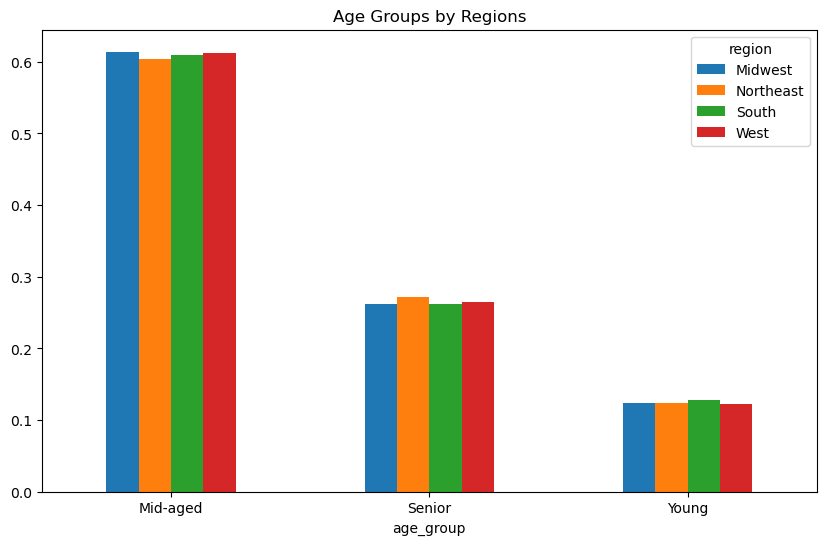

In [126]:
# Create grouped bar chart
grouped_chart=crosstab_age_region.plot(kind='bar', figsize=(10,6), title='Age Groups by Regions', rot=0)

In [120]:
# Set the x and y axis labels
grouped_chart.set_xlabel("Region")
grouped_chart.set_ylabel("Proportion")

Text(4.444444444444452, 0.5, 'Proportion')

In [127]:
# Exporting vizb
grouped_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_grouped_bar.png'))


### b. Income

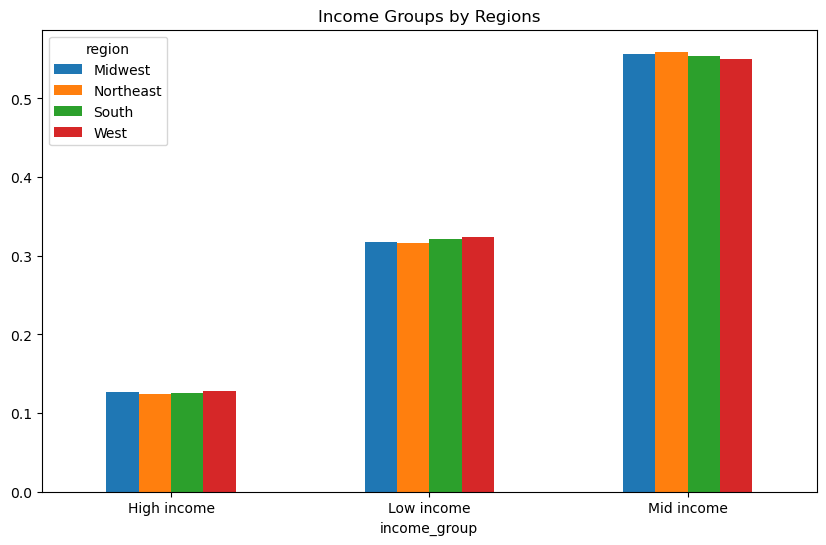

In [129]:
# Create grouped bar chart
grouped_chart_income=crosstab_income_region.plot(kind='bar', figsize=(10,6), title='Income Groups by Regions', rot=0)

In [130]:
# Exporting vizb
grouped_chart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_grouped_bar.png'))

### c. Veganism

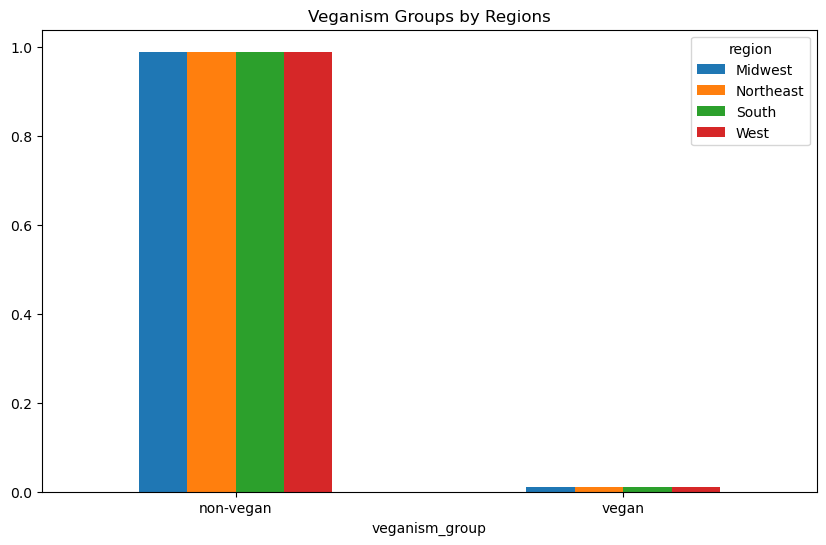

In [90]:
# Create grouped bar chart
grouped_chart_vegan=crosstab_vegan_region.plot(kind='bar', figsize=(10,6), title='Veganism Groups by Regions', rot=0)

In [91]:
# Exporting vizb
grouped_chart_vegan.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_region_grouped_bar.png'))

### d. Family size

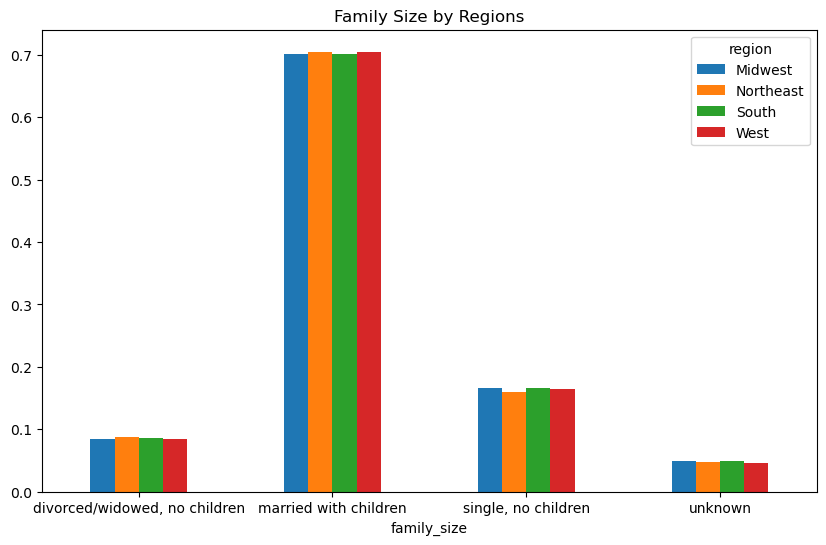

In [133]:
# Create grouped bar chart
grouped_chart_family=crosstab_family_region.plot(kind='bar', figsize=(10,6), title='Family Size by Regions', rot=0)

In [134]:
# Exporting vizb
grouped_chart_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_region_grouped_bar.png'))

### 2. Customer Profiles by Dapartment

### a. Age

Text(0, 0.5, 'Proportion')

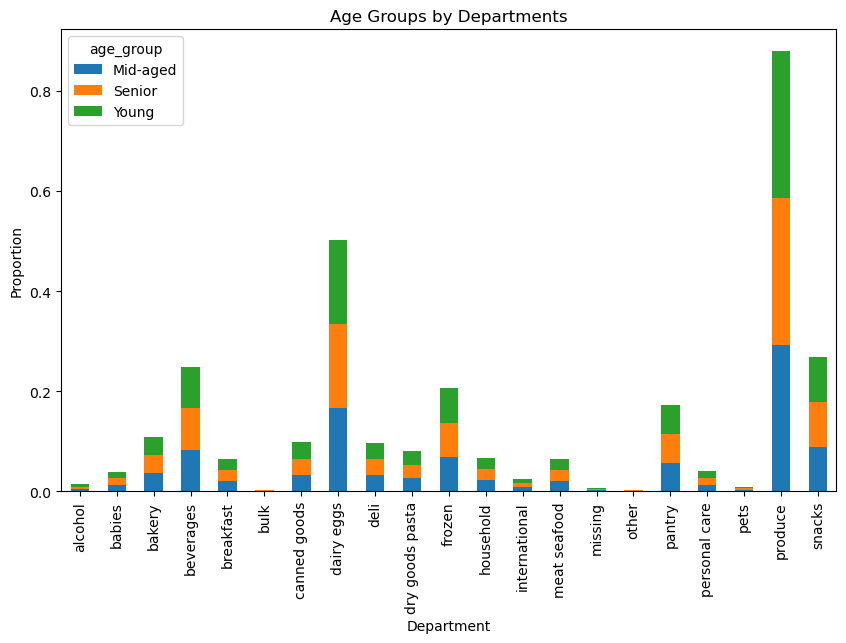

In [184]:
# Create stacked chart
stack_chart1=crosstab_age_department.T.plot(kind='bar', stacked=True, figsize=(10,6), title='Age Groups by Departments')
plt.xlabel('Department')
plt.ylabel('Proportion')

Observation: Produce is the most popular department among all age groups, with a proportion ranging from 29% to 30%.

There are not much differences between age groups in terms of their ordering habits. Therefore, the company can continue to offer similar products across departments, and age group segmentation may not be an effective strategy to optimize sales.

In [185]:
# Exporting vizb
stack_chart1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_stacked.png'))

### b. Income

Text(0, 0.5, 'Proportion')

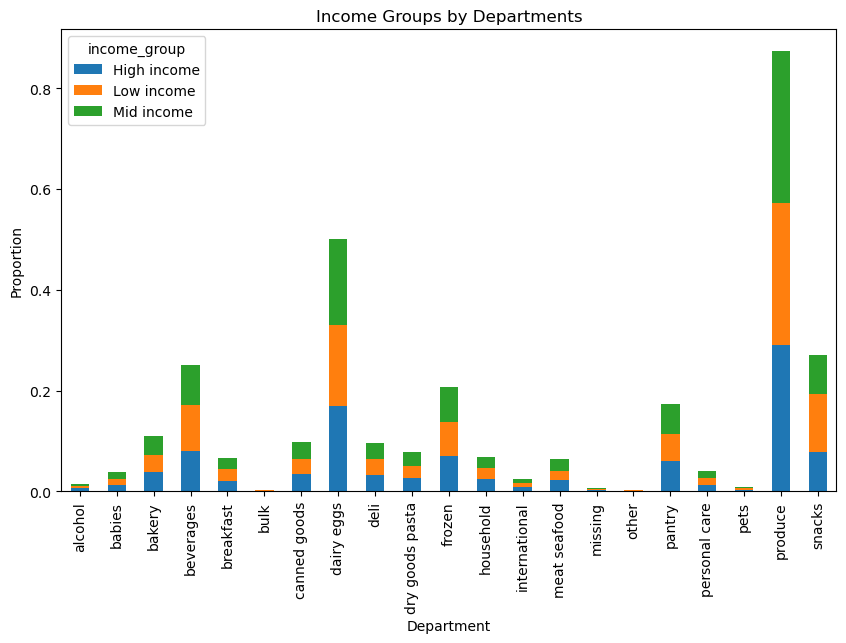

In [187]:
# Create stacked chart
stack_chart2=crosstab_income_department.T.plot(kind='bar', stacked=True, figsize=(10,6), title='Income Groups by Departments')
plt.xlabel('Department')
plt.ylabel('Proportion')

Observation: Tt appears that "produce" was the most frequently purchased department across all three age groups, followed by dairy eggs. There are not much differences on department preferences among 3 income groups.

In [188]:
# Exporting vizb
stack_chart2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_stacked.png'))

### c. Veganism

Text(0, 0.5, 'Proportion')

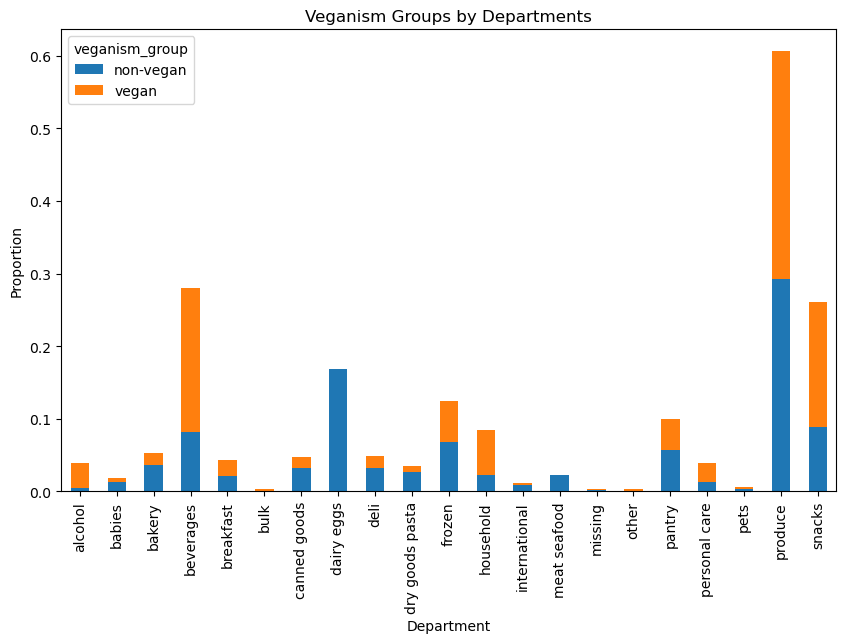

In [189]:
# Create stacked chart
stack_chart3=crosstab_vegan_department.T.plot(kind='bar', stacked=True, figsize=(10,6), title='Veganism Groups by Departments')
plt.xlabel('Department')
plt.ylabel('Proportion')

Obsrvation: We can see that the department buying behavior is quite different between the two veganism groups.

For non-vegan group, the most commonly bought departments are produce, dairy eggs, canned goods, and bakery, while for vegan group, the most commonly bought departments are frozen, produce, snacks, and international.

Additionally, it's interesting to note that the vegan group has a significantly higher percentage of spending on the frozen department compared to the non-vegan group, while the non-vegan group spends a higher percentage on alcohol compared to the vegan group.

In [190]:
# Exporting vizb
stack_chart3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'veganism_department_stacked.png'))

### d. Family Size

Text(0, 0.5, 'Proportion')

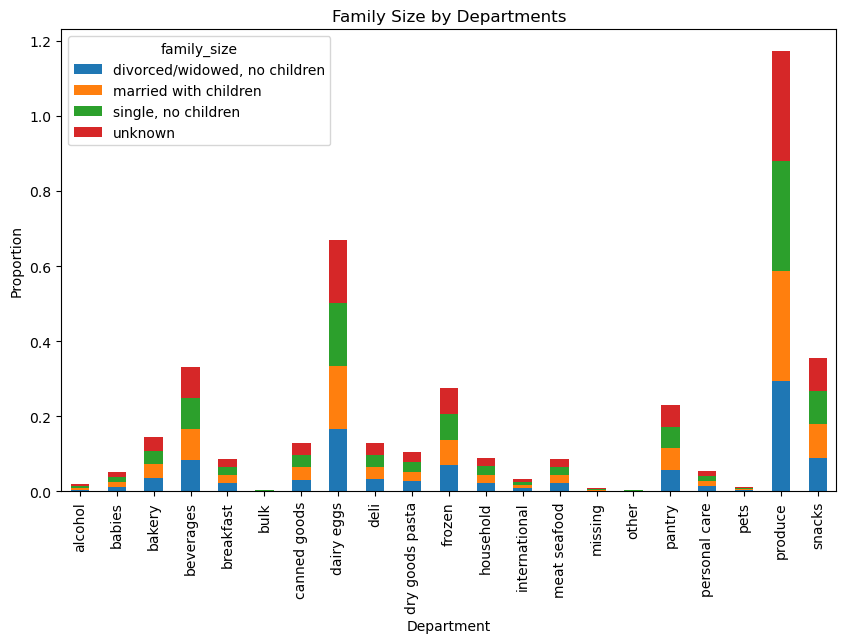

In [191]:
# Create stacked chart
stack_chart4=crosstab_family_department.T.plot(kind='bar', stacked=True, figsize=(10,6), title='Family Size by Departments')
plt.xlabel('Department')
plt.ylabel('Proportion')

Observation: There are some small differences in purchasing patterns across different family sizes, though it's not significant. Customers who are divorced/widowed with no children tend to purchase slightly more bulk items than other groups.

In [192]:
# Exporting vizb
stack_chart4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_department_stacked.png'))

### 3. Extra Analysis

### Customer Profiling Variables by Spending

In [194]:
df_ic_active.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,price_range_loc,max_order,loyalty_flag,avg_order,spending_flag,median_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,True,region,exclusion,age_group,income_group,veganism_group,family_size,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children,beverages


### a. Age

In [199]:
# Creating a crosstab comparing 'age_group' and 'spending_flag', looking at row percentages
crosstab_age_spending = pd.crosstab(df_ic_active['age_group'], df_ic_active['spending_flag'], normalize = 'index')

In [200]:
crosstab_age_spending

spending_flag,High spender,Low spender
age_group,,
Mid-aged,0.019706,0.980294
Senior,0.019143,0.980857
Young,0.019149,0.980851


Observation: The data suggests that there is no significant difference in spending habits between age groups, as the proportion of high spenders and low spenders is very similar across all three groups. Overall, the customers tend to be low spenders.

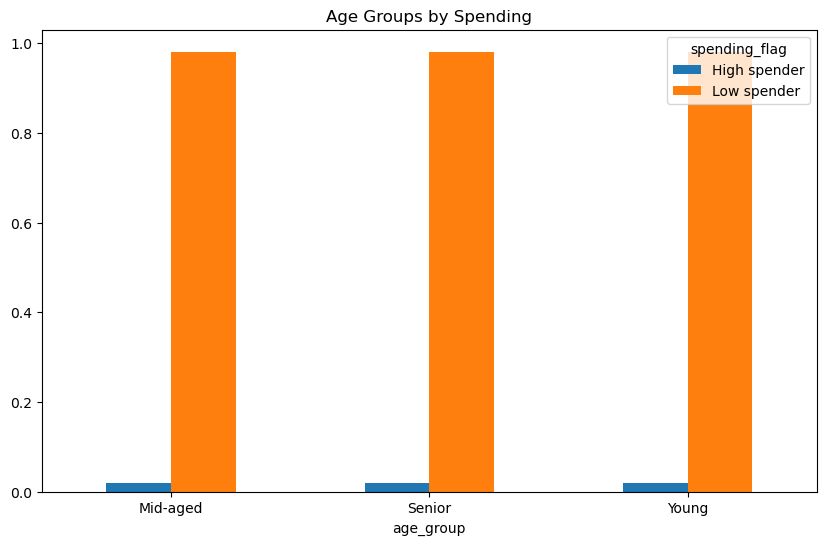

In [201]:
# Create grouped bar chart
grouped_chart_spending1=crosstab_age_spending.plot(kind='bar', figsize=(10,6), title='Age Groups by Spending', rot=0)

In [202]:
# Exporting vizb
grouped_chart_spending1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_spending_grouped_bar.png'))

### b. Income

In [195]:
# Creating a crosstab comparing 'income_group' and 'spending_flag', looking at row percentages
crosstab_income_spending = pd.crosstab(df_ic_active['income_group'], df_ic_active['spending_flag'], normalize = 'index')

In [196]:
crosstab_income_spending

spending_flag,High spender,Low spender
income_group,,
High income,0.099840,0.900160
Low income,0.003048,0.996952
Mid income,0.010740,0.989260


Observation: The table indicates that a much higher proportion of customers in the high-income group are classified as "High spender" (9.98%) compared to customers in the low-income group (0.30%) and mid-income group (1.07%). Conversely, a much higher proportion of customers in the low-income group are classified as "Low spender" (99.70%) compared to customers in the high-income group (90.02%) and mid-income group (98.93%).

These results suggest that there is a strong correlation between a customer's income level and their spending behavior. Customers with high incomes are more likely to spend more money on their purchases compared to customers with low incomes or mid-incomes.

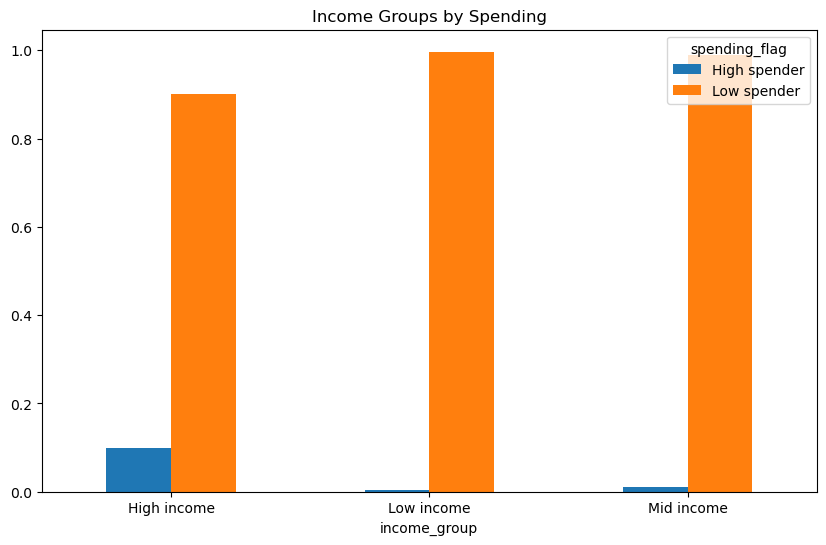

In [197]:
# Create grouped bar chart
grouped_chart_spending=crosstab_income_spending.plot(kind='bar', figsize=(10,6), title='Income Groups by Spending', rot=0)

In [198]:
# Exporting vizb
grouped_chart_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_spending_grouped_bar.png'))

### c. Veganism

In [204]:
# Creating a crosstab comparing 'veganism_group' and 'spending_flag', looking at row percentages
crosstab_veganism_spending= pd.crosstab(df_ic_active['veganism_group'], df_ic_active['spending_flag'], normalize = 'index')

In [205]:
crosstab_veganism_spending

spending_flag,High spender,Low spender
veganism_group,,
non-vegan,0.019484,0.980516
vegan,0.019884,0.980116


Observation: we can see that the proportion of high spenders to low spenders is very similar between non-vegan and veganism groups. Both groups have a higher proportion of low spenders (around 98%) compared to high spenders (around 2%)

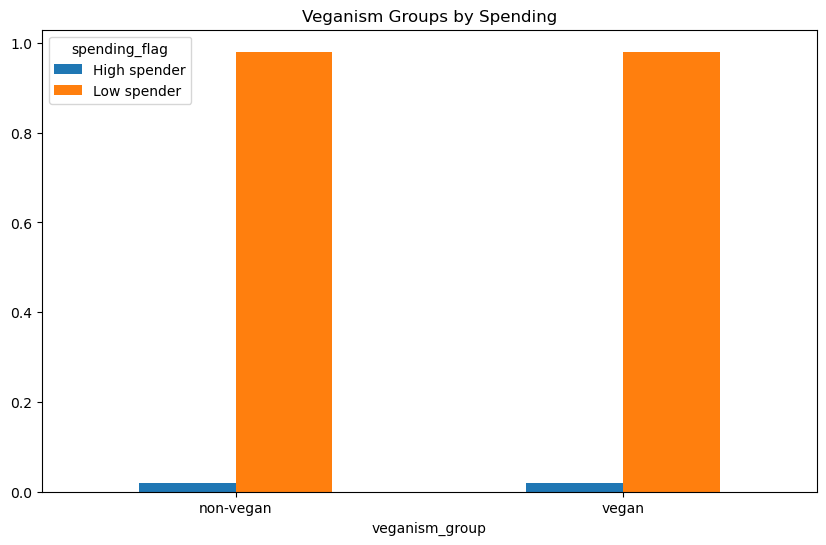

In [207]:
# Create grouped bar chart
grouped_chart_spending2=crosstab_veganism_spending.plot(kind='bar', figsize=(10,6), title='Veganism Groups by Spending', rot=0)

In [208]:
# Exporting viz
grouped_chart_spending2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'veganism_spending_grouped_bar.png'))

### d. Family size

In [209]:
# Creating a crosstab comparing 'family_size' and 'spending_flag', looking at row percentages
crosstab_family_spending= pd.crosstab(df_ic_active['family_size'], df_ic_active['spending_flag'], normalize = 'index')

In [210]:
crosstab_family_spending

spending_flag,High spender,Low spender
family_size,,
"divorced/widowed, no children",0.019023,0.980977
married with children,0.019751,0.980249
"single, no children",0.018789,0.981211
unknown,0.018854,0.981146


Observation: There is not a significant difference in the proportion of high spenders and low spenders across the different family size groups. All of the proportions are very similar, with high spenders representing about 1.9% and low spenders representing about 98.1% of all customers in each group

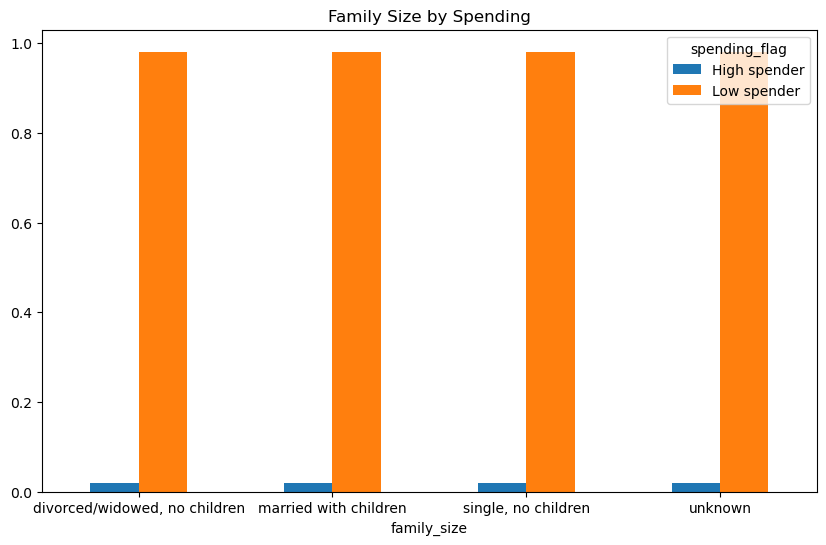

In [212]:
# Create grouped bar chart
grouped_chart_spending3=crosstab_family_spending.plot(kind='bar', figsize=(10,6), title='Family Size by Spending', rot=0)

## Questions from Project Brief

### Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts

In [4]:
# Import the customer_data_set dataframe
df_ic_cus = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customer_profiles.pkl'))

In [5]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [12]:
df_ic_cus.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,price_range_loc,max_order,loyalty_flag,avg_order,spending_flag,median_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,True,region,exclusion,age_group,income_group,veganism_group,family_size
0,2539329,1,prior,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children
1,2398795,1,prior,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children
2,473747,1,prior,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children
3,2254736,1,prior,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children
4,431534,1,prior,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,active,Mid-aged,Low income,non-vegan,married with children


Text(0.5, 1.0, 'Price Range Distribution')

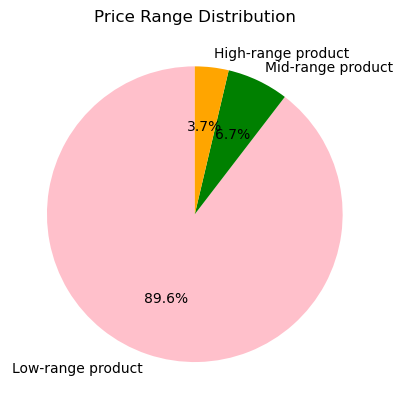

In [69]:
# Create a pie chart for price range

value_counts = df_ic_cus['price_range_loc'].value_counts()
labels = value_counts.index
counts = value_counts.values
percentages = counts / counts.sum() * 100
colors = ['pink', 'green', 'orange']

plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Price Range Distribution")


In [68]:
# Exporting the viz
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_pie.png'))

<Figure size 640x480 with 0 Axes>

In [67]:
# Show the plot
plt.show()

### Are there certain types of products that are more popular than others?   
### The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [47]:
df_ic_cus['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

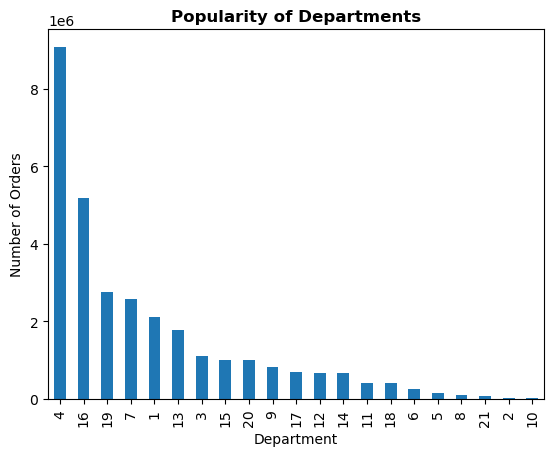

In [48]:
#bar chart for departments with the highest frequency of product orders
popular_dept_count = df_ic_cus['department_id'].value_counts(dropna=False)
popular_dept = popular_dept_count.plot.bar()
plt.title('Popularity of Departments', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

In [51]:
# Exporting viz
popular_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'populrity_by_department.png'))

### Are there differences in ordering habits based on a customer’s loyalty status? 

In [37]:
# Creating a crosstab comparing 'loyalty_flag' and 'department'
crosstab_department_loyal= pd.crosstab(df_ic_cus['department_id'], df_ic_cus['loyalty_flag'])

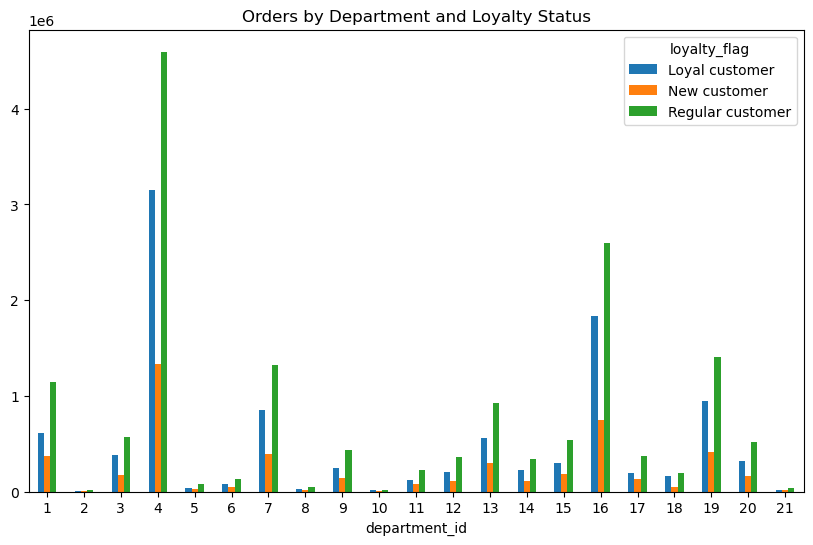

In [33]:
# Creating a crosstab comparing 'loyalty_flag' and 'department'
crosstab_department_loyal= pd.crosstab(df_ic_cus['department_id'], df_ic_cus['loyalty_flag'])# Create grouped bar chart
grouped_chart_loyal_department=crosstab_department_loyal.plot(kind='bar', figsize=(10,6), title='Orders by Department and Loyalty Status', rot=0)

In [34]:
# Exporting viz
grouped_chart_loyal_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department_loyalty_status_bar.png'))

In [39]:
# Creating a crosstab comparing 'loyalty_flag' and 'order_day_of_week'
crosstab_dow_loyal= pd.crosstab(df_ic_cus['order_day_of_week'], df_ic_cus['loyalty_flag'])

In [40]:
crosstab_dow_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
order_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


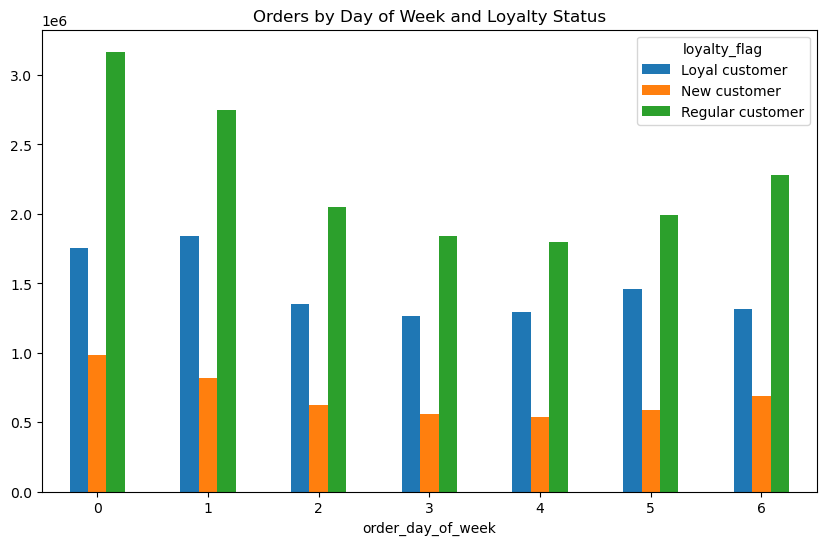

In [41]:
# Create grouped bar chart
grouped_chart_loyal_dow=crosstab_department_loyal.plot(kind='bar', figsize=(10,6), title='Orders by Day of Week and Loyalty Status', rot=0)

Observation: 
The highest count of Loyal customers is observed on day 1 (Monday). This suggests that Mondays attract a significant number of customers who consistently show loyalty to the business.
New customers are relatively evenly distributed throughout the week, with the highest count on day 0 (Sunday)
Regular customers show the highest count on day 6 (Saturday). This indicates that Saturdays tend to have a larger number of customers who shop regularly but may not have a strong loyalty status.
Overall, different days of the week attract varying customer behaviors, with some days being more popular among loyal customers while others have higher counts of new or regular customers. This information can be valuable for businesses to plan their marketing and promotional strategies tailored to different customer segments on specific days of the week.

In [42]:
# Exporting viz
grouped_chart_loyal_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_dow_loyalty_status_bar.png'))

### Are there differences in ordering habits based on a customer’s region?

In [70]:
# Import the customer_data_set dataframe
df_ic = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_final.pkl'))

In [74]:
# Creating a crosstab comparing 'department' and 'region'
crosstab_department_region= pd.crosstab(df_ic['region'], df_ic['department'])

In [77]:
crosstab_department_region

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,498225,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,370436,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,709906,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,543164,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


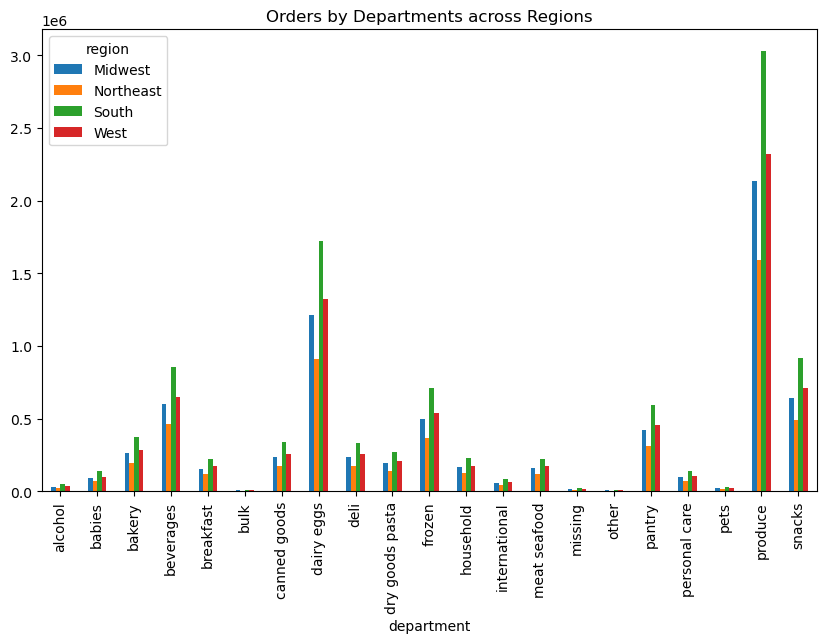

In [76]:
# Create grouped bar chart
grouped_chart_dep_region=crosstab_department_region.T.plot(kind='bar', figsize=(10,6), title='Orders by Departments across Regions')

In [78]:
# Exporting viz
grouped_chart_dep_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_dep_regions.png'))

In [84]:
 # Creating a crosstab comparing 'order_day_of_week' and 'region'
crosstab_dow_region= pd.crosstab(df_ic['region'], df_ic['order_day_of_week'])

In [85]:
crosstab_dow_region

order_day_of_week,0,1,2,3,4,5,6
region,,,,,,,
Midwest,1390189,1263655,947370,855316,851501,943396,1010086
Northeast,1043698,954332,713159,649305,637781,716128,750282
South,1955352,1808348,1340387,1229002,1205497,1342849,1429704
West,1519371,1385351,1023790,935912,930215,1031356,1101232


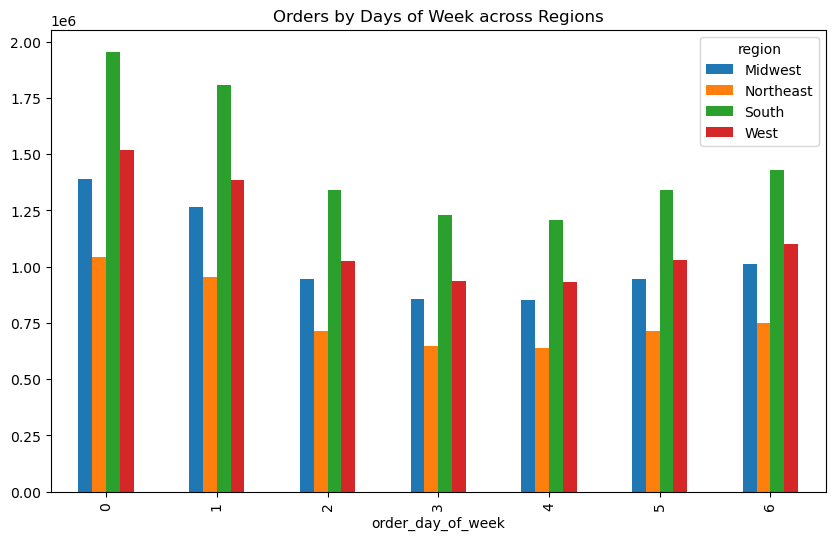

In [82]:
# Create grouped bar chart
grouped_chart_dow_region=crosstab_dow_region.T.plot(kind='bar', figsize=(10,6), title='Orders by Days of Week across Regions')

In [83]:
# Exporting viz
grouped_chart_dow_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_dow_regions.png'))

## Step 10. Export Data

In [213]:
# Exporting final data set as 
df_ic.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_final_official.pkl'))

In [221]:
df_ic.shape

(30964564, 41)